<a href="https://colab.research.google.com/github/ryanskytree/Machine-Learning-Practice/blob/main/Lab_9_feature_reduction_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

train = pd.read_csv("/content/drive/My Drive/503Coursework/INPUT/heart.csv")[:-100]
test = pd.read_csv("/content/drive/My Drive/503Coursework/INPUT/heart.csv")[-100:]

# select all columns except the last one (the target label)
x_train=train.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_train=train.iloc[:,13]

# select all columns except the last one (the target label)
x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_test=test.iloc[:,13]
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0


In [5]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func = f_classif, k = 5)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(x_train, y_train)
names = x_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

  Feat_names   F_Scores
3    oldpeak  48.944466
0         cp  32.905072
4       thal  28.716406
2      exang  27.558516
1    thalach  22.116852


In [6]:
x_train.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [7]:
selector.get_support()

array([False, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True])

In [8]:
selector.scores_

array([ 5.16938913, 15.41170131, 32.9050715 ,  0.19622471,  0.45609399,
        0.30941949, 11.60052066, 22.11685221, 27.55851582, 48.94446611,
       16.66136829, 17.80089878, 28.71640564])

In [9]:
ns_df.sort_values('F_Scores', ascending=False)

,Feat_names,F_Scores
3,oldpeak,48.944466
0,cp,32.905072
4,thal,28.716406
2,exang,27.558516
1,thalach,22.116852


In [34]:
#REF
# select all columns except the last one (the target label)
x_train=train.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_train=train.iloc[:,13]

# select all columns except the last one (the target label)
x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_test=test.iloc[:,13]

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 5)
#you can always modify the parameter value, n_features_to_select based on how many features you would like to use.
#It will give you the best features.
rfe = RFE(estimator = model, n_features_to_select = 5)
fit = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % fit.support_ )
print("Feature Ranking: %s" % fit.ranking_ )

#in this step, since we define no of features = 5, we get the top 5 features out of all features.
feature_names = np.array(x_train.columns)
print(feature_names[fit.support_])

Num Features: 5
Selected Features: [False False  True False False False False  True False  True False  True
  True]
Feature Ranking: [3 8 1 4 2 9 7 1 6 1 5 1 1]
['cp' 'thalach' 'oldpeak' 'ca' 'thal']


In [12]:
# Boruta

import numpy as np
### make X_shadow by randomly permuting each column of X
np.random.seed(42)
X_shadow = x_train.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in x_train.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([x_train, X_shadow], axis = 1)

In [13]:
X_boruta

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,shadow_trestbps,shadow_chol,shadow_fbs,shadow_restecg,shadow_thalach,shadow_exang,shadow_oldpeak,shadow_slope,shadow_ca,shadow_thal
0,63,1,3,145,233,1,0,150,0,2.3,...,145,177,1,1,150,0,0.0,2,0,2
1,37,1,2,130,250,0,1,187,0,3.5,...,138,172,1,1,158,0,1.2,1,1,3
2,41,0,1,130,204,0,0,172,0,1.4,...,130,305,0,1,146,0,1.4,0,1,2
3,56,1,1,120,236,0,1,178,0,0.8,...,120,149,1,0,179,0,0.0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,...,160,254,1,0,142,0,0.4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,62,1,0,120,267,0,1,99,1,1.8,...,134,313,0,1,169,0,0.0,2,0,2
199,65,1,0,110,248,0,0,158,0,0.6,...,170,263,0,0,178,0,0.0,2,0,3
200,44,1,0,110,197,0,0,177,0,0.0,...,140,233,0,0,152,0,0.0,2,0,2
201,60,1,0,125,258,0,0,141,1,2.8,...,130,177,0,0,162,0,0.8,2,0,2


In [15]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 808.1 kB/s eta 0:00:00


In [16]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

forest = RandomForestClassifier(max_depth = 5)

feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(np.array(x_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=69,
                                          random_state=RandomState(MT19937) at 0x7A7B127FFD40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7A7B127FFD40, verbose=2)

In [17]:
feat_selector.support_

array([False, False,  True, False, False, False, False,  True, False,
        True, False,  True,  True])

In [18]:
feat_selector.ranking_

array([4, 7, 1, 5, 2, 9, 8, 1, 3, 1, 5, 1, 1])

In [19]:
feature_df = pd.DataFrame(x_train.columns.tolist(), columns=['features'])
feature_df ['rank']=feat_selector.ranking_

In [20]:
print (feature_df.head(feat_selector.n_features_))

   features  rank
0       age     4
1       sex     7
2        cp     1
3  trestbps     5
4      chol     2


In [37]:
#Dimensionality Reduction (Linear Discriminant Analysis)
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x_train, y_train)
print(y_train)
lda.explained_variance_ratio_
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, y_train, random_state=1)

from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix(Y_test, Y_pred)
accuracy_score(Y_test, Y_pred)

0      1
1      1
2      1
3      1
4      1
      ..
198    0
199    0
200    0
201    0
202    0
Name: target, Length: 203, dtype: int64


0.9019607843137255

In [42]:
#PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(2) # we need 2 principal components.

converted_data = pca.fit_transform(x_train)

converted_data.shape

(203, 2)

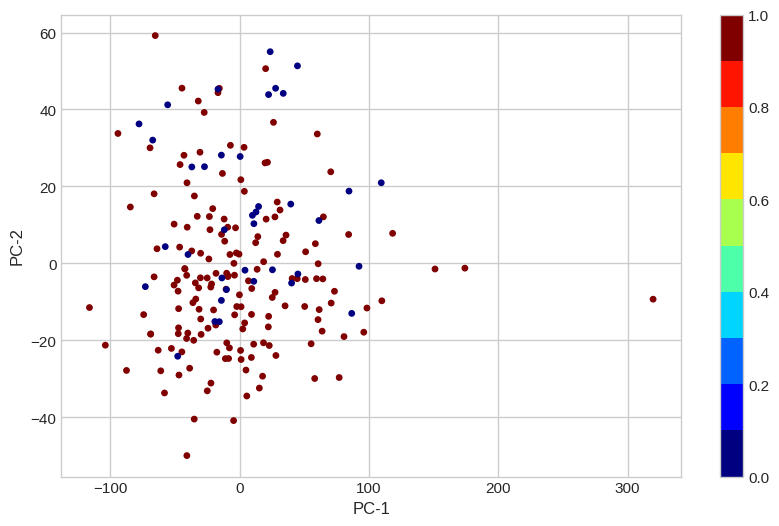

In [44]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = y_train)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [59]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# data scaling
x_scaled = StandardScaler().fit_transform(x_train)
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca_features = pca.fit_transform(x_train)

print('Shape before PCA: ', x_train.shape)
print('Shape after PCA: ', pca_features.shape)

pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3','PC4'])

Shape before PCA:  (203, 13)
Shape after PCA:  (203, 4)


In [60]:
target_names = {
    0:'1',
    1:'0',
}

pca_df['target'] = y_train
pca_df['target'] = pca_df['target'].map(target_names)

pca_df

,PC1,PC2,PC3,PC4,target
0,-9.129238,9.395175,16.260629,6.136829,0
1,5.637176,-34.492487,2.470011,-8.754912,0
2,-39.985374,-18.129583,3.299832,-6.392505,0
3,-7.786774,-21.983225,-5.436721,9.632679,0
4,110.022907,-9.738452,-13.695265,2.286687,0
...,...,...,...,...,...
198,23.712473,55.024601,-17.356328,-3.730795,1
199,4.242220,-1.787296,-17.518586,14.886513,1
200,-47.785262,-24.159835,-14.866817,1.133972,1
201,14.732018,14.777163,-6.352860,3.390124,1


In [61]:
pca.explained_variance_

array([2734.8104,  447.8186,  252.6849,   52.4895])

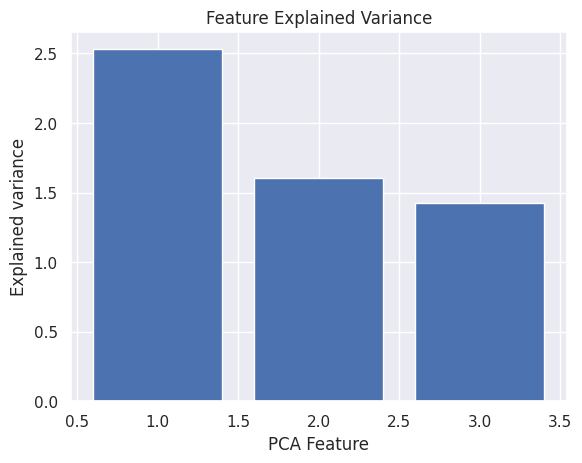

In [62]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
sns.set()

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)

# Fit and transform data
pca.fit_transform(x_scaled)

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

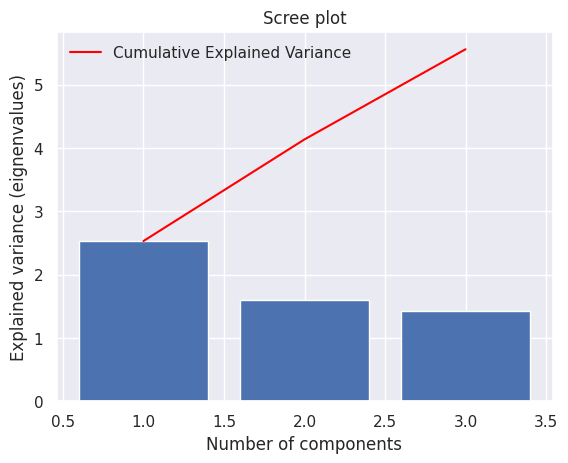

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
sns.set()

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)

# Fit and transform data
reduced_features = pca.fit_transform(x_scaled)

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

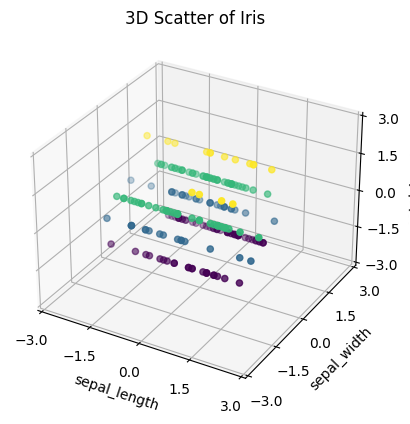

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
plt.style.use('default')

# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]

# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of Iris')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

In [66]:
import pandas as pd
from sklearn.decomposition import PCA

# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2'])

# map target names to PCA features
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

pca_df['target'] = y_train
pca_df['target'] = pca_df['target'].map(target_names)

pca_df.head()

,PC1,PC2,target
0,1.398204,1.933330,versicolor
1,0.219941,-1.096595,versicolor
2,-1.174785,0.018788,versicolor
3,-1.246937,-0.492615,versicolor
4,0.091771,0.716909,versicolor


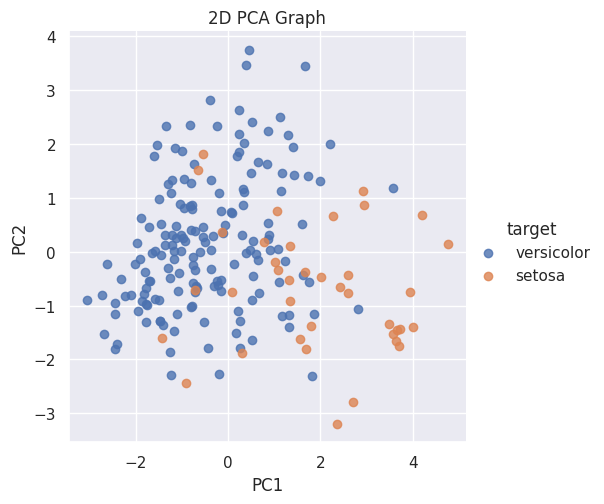

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    hue='target',
    fit_reg=False,
    legend=True
    )

plt.title('2D PCA Graph')
plt.show()